# Task 1: Python Setup & Data Creation


### 1.1 Create variables for city name, number of road segments, and average speed.


In [45]:

city_name = "Nagpur"
number_of_road_segments = 8
average_speed_kmh = 42.5





### 1.2 Print a formatted sentence using the variables.

In [46]:
print("City:", city_name)
print("Number of road segments:", number_of_road_segments)
print("Average speed in the city is", average_speed_kmh, "km/h.")

City: Nagpur
Number of road segments: 8
Average speed in the city is 42.5 km/h.



### 1.3 Create a Python list containing speeds of at least 6 road segments.

In [12]:
# create 8 speeds to match the number_road_segments variable above.
speed_list = [55, 25, 60, 42, 15, 70, 28, 50]
print("\nList of road speeds:", speed_list)


List of road speeds: [55, 25, 60, 42, 15, 70, 28, 50]


# Task 2: Python Logic on Traffic Data

### 2.1 Using a loop, print each road speed from the list.

In [58]:
print("--- Printing speeds using loop ---")
print("Road # : speed ")
for i,speed in enumerate(speed_list,start=1):
    print(f'road {i} : {speed} kmph')




--- Printing speeds using loop ---
Road # : speed 
road 1 : 55 kmph
road 2 : 25 kmph
road 3 : 60 kmph
road 4 : 42 kmph
road 5 : 15 kmph
road 6 : 70 kmph
road 7 : 28 kmph
road 8 : 50 kmph


### 2.2 Identify and print road speeds that are less than 30 km/h.

In [62]:
print("\nRoads with speed < 30 km/h:")
traffic_prone_speeds = []
for i, sp in enumerate(speed_list, start=1):
    if sp < 30:
        print(f" Road {i}: {sp} km/h")






Roads with speed < 30 km/h:
 Road 2: 25 km/h
 Road 5: 15 km/h
 Road 7: 28 km/h


### 2.3 Count how many roads are traffic-prone (speed < 30 km/h)

In [63]:
# We initialize a counter variable to zero.
traffic_prone_count = 0

# Loop through the list again to count.
for speed in speed_list:
    if speed < 30:
        # If speed is less than 30, increase the count by 1.
        traffic_prone_count += 1

print(f"\nTotal number of traffic-prone roads ie speed <30kmph : {traffic_prone_count}")


Total number of traffic-prone roads ie speed <30kmph : 3


# Task 3: NumPy - Speed & Time Computation

###3.1  Convert the speed list into a NumPy array.

In [16]:
import numpy as np
speed_array = np.array(speed_list)
print("NumPy Speed Array:", speed_array)





NumPy Speed Array: [55 25 60 42 15 70 28 50]


### 3.2 Compute mean, maximum, minimum speed.

In [31]:
mean_speed = np.mean(speed_array)
max_speed = np.max(speed_array)
min_speed = np.min(speed_array)

print(f"\nMean Speed: {mean_speed:>3.2f} km/h") # .2f formats to 2 decimal places
print(f"Max Speed: {max_speed:>3} km/h")
print(f"Min Speed: {min_speed:>3} km/h")


Mean Speed: 43.12 km/h
Max Speed:  70 km/h
Min Speed:  15 km/h


### 3.3 Assume each road is 2 km long and compute travel time for each road.
### Formula: Time = Distance / Speed.

In [73]:
road_length_km = 2
# NumPy allows dividing a single number (2) by the whole array at once.
travel_times_hours = road_length_km / speed_array

print("\nTravel time for each road (hrs):")
for i, thr in enumerate(travel_times_hours, start=1):
    print(f" Road {i}: {thr:.3f} hours")

travel_time_minutes = travel_times_hours * 60   # convert hours to minutes

print("\nTravel time for each road (min):")
for i, tmin in enumerate(travel_time_minutes, start=1):
    print(f" Road {i}: {tmin:.2f} minutes")




Travel time for each road (hrs):
 Road 1: 0.036 hours
 Road 2: 0.080 hours
 Road 3: 0.033 hours
 Road 4: 0.048 hours
 Road 5: 0.133 hours
 Road 6: 0.029 hours
 Road 7: 0.071 hours
 Road 8: 0.040 hours

Travel time for each road (min):
 Road 1: 2.18 minutes
 Road 2: 4.80 minutes
 Road 3: 2.00 minutes
 Road 4: 2.86 minutes
 Road 5: 8.00 minutes
 Road 6: 1.71 minutes
 Road 7: 4.29 minutes
 Road 8: 2.40 minutes


# Task 4: Pandas - Traffic DataFrame Operations

In [41]:
import pandas as pd

# Preparation data for the DataFrame
# Creating IDs based on the number of speeds we have (e.g., R1, R2...)
num_roads = len(speed_list)
road_ids = []
for i in range(num_roads):
    road_ids.append(f"R{i+1}")

# Creating a list where every road is 2km long, based on Task 3 assumption.
lengths_list = [2] * num_roads

# 1. Create a Pandas DataFrame with columns: Road_ID, Speed, Length.
data = {
    'Road_ID': road_ids,
    'Speed': speed_list,
    'Length': lengths_list
}
df = pd.DataFrame(data)
print("--- Original DataFrame ---")
print(df)

# 2. Add a new column Travel_Time.
# We can use the numpy array we calculated in Task 3.
df['Travel_Time'] = travel_times_hours
print("\n--- DataFrame with Travel_Time Added ---")
print(df)

# 3. Sort the DataFrame based on Travel_Time.
# ascending=True sorts from lowest time to highest time.
df_sorted = df.sort_values(by='Travel_Time', ascending=True)
print("\n--- DataFrame Sorted by Travel_Time ---")
print(df_sorted)

# 4. Add a column Traffic_Level based on speed ranges
# Example rules:
# Speed < 20  -> "High"
# 20 <= Speed < 40 -> "Medium"
# Speed >= 40 -> "Low"

traffic_levels = []
for speed in df["Speed"]:
    if speed < 20:
        level = "High"
    elif speed < 40:
        level = "Medium"
    else:
        level = "Low"
    traffic_levels.append(level)

# Assign this newly created list to a new column in the DataFrame.
df['Traffic_Level'] = traffic_levels
print("\n--- Final DataFrame with Traffic_Level ---")
print(df)

--- Original DataFrame ---
  Road_ID  Speed  Length
0      R1     55       2
1      R2     25       2
2      R3     60       2
3      R4     42       2
4      R5     15       2
5      R6     70       2
6      R7     28       2
7      R8     50       2

--- DataFrame with Travel_Time Added ---
  Road_ID  Speed  Length  Travel_Time
0      R1     55       2     0.036364
1      R2     25       2     0.080000
2      R3     60       2     0.033333
3      R4     42       2     0.047619
4      R5     15       2     0.133333
5      R6     70       2     0.028571
6      R7     28       2     0.071429
7      R8     50       2     0.040000

--- DataFrame Sorted by Travel_Time ---
  Road_ID  Speed  Length  Travel_Time
5      R6     70       2     0.028571
2      R3     60       2     0.033333
0      R1     55       2     0.036364
7      R8     50       2     0.040000
3      R4     42       2     0.047619
6      R7     28       2     0.071429
1      R2     25       2     0.080000
4      R5     15   

# Task 5: Matplotlib - Traffic Visualization

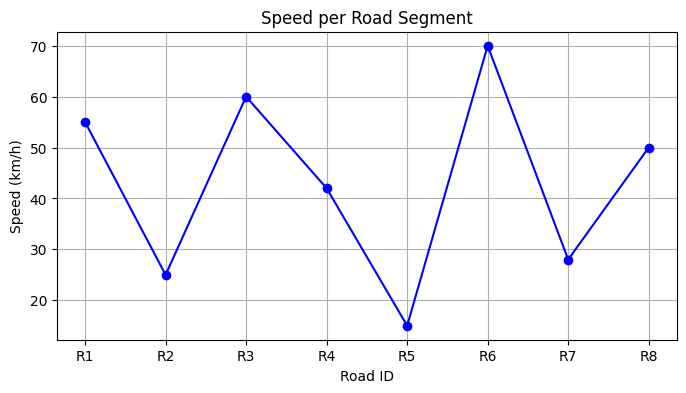

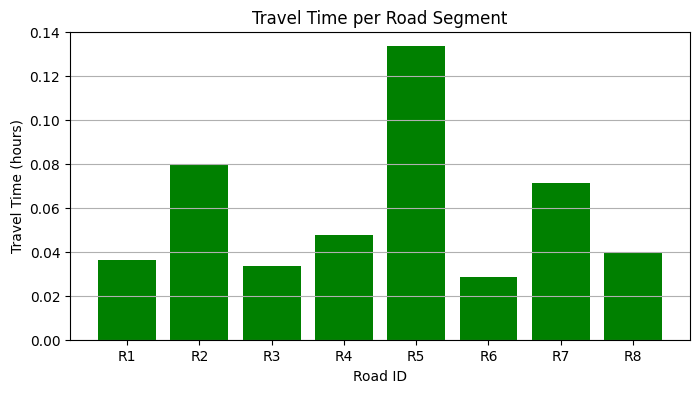

In [42]:
import matplotlib.pyplot as plt

# 1. Plot Speed vs Road_ID using a line plot.
plt.figure(figsize=(8, 4)) # Sets the size of the plot
plt.plot(df['Road_ID'], df['Speed'], marker='o', linestyle='-', color='blue')

# 3. Add title, axis labels, and grid to the plot.
plt.title('Speed per Road Segment')
plt.xlabel('Road ID')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.show() # Displays the first plot

# 2. Plot Travel_Time vs Road_ID using a bar plot.
plt.figure(figsize=(8, 4))
plt.bar(df['Road_ID'], df['Travel_Time'], color='green')

# 3. Add title, axis labels, and grid to the plot.
plt.title('Travel Time per Road Segment')
plt.xlabel('Road ID')
plt.ylabel('Travel Time (hours)')
# Adding grid only on the y-axis for easier reading of bar heights
plt.grid(axis='y')
plt.show() # Displays the second plot

# Bonus

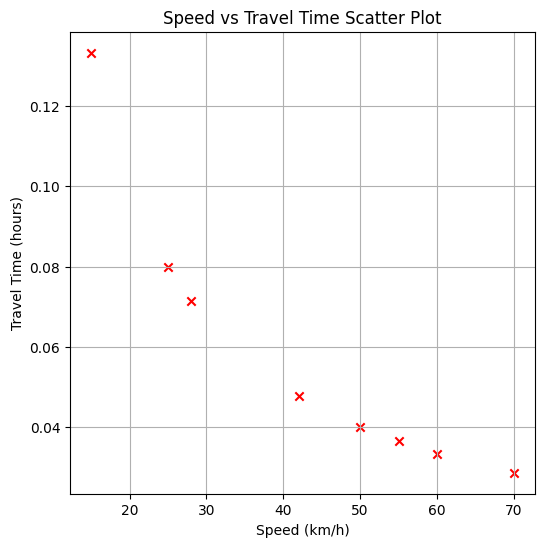

In [44]:
# Create a scatter plot showing Speed vs Travel_Time using Matplotlib[cite: 28].
plt.figure(figsize=(6, 6))
plt.scatter(df['Speed'], df['Travel_Time'], color='red', marker='x')

# Adding labels for clarity
plt.title('Speed vs Travel Time Scatter Plot')
plt.xlabel('Speed (km/h)')
plt.ylabel('Travel Time (hours)')
plt.grid(True)
plt.show()